# `vaex` @ Goto Copenhagen 2021

## New York Taxi Dataset (2009-2015): Exploratory Data Analysis example

Original (raw) data can be found at:
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np

import pylab as plt
import seaborn as sns

## Concepts being `vaex`
 - memory mappable storage
 - expression system
 - delayed (a.k.a _lazy_) evaluations
 - efficient algorithms
 - emphasis on aggregate data properties instead of individual samples

### Memory mappable storage (read in the data)

In [2]:
# Check file size on disk
!du -h /data/yellow_taxi_*

164G	/data/yellow_taxi_2009_2015.hdf5
108G	/data/yellow_taxi_2009_2015_f32.hdf5
12G	/data/yellow_taxi_2015_f32.arrow
12G	/data/yellow_taxi_2015_f32.hdf5


In [3]:
# Opens the data in hdf5 format
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

In [4]:
# df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')
# df = df[(df.passenger_count>0) & (df.passenger_count<7)]
# df = df[(df.trip_distance>0) & (df.trip_distance<10)]
# df = df.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])

# long_min = -74.05
# long_max = -73.75
# lat_min = 40.58
# lat_max = 40.90

# # Make a selection based on the boundaries
# df = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
#         (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
#         (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
#         (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]


# df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))
# df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')


# # Slow
# plt.figure(figsize=(8,4))
# df.viz.histogram('trip_duration_min', f='log1p', progress='widget')
# plt.show()

In [4]:
# Basic view of the contents
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.99196,40.721565,nan,nan,-73.993805,40.695923,8.9,0.5,nan,0.0,0.0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.73629,nan,nan,-73.95585,40.76803,12.1,0.5,nan,2.0,0.0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.00259,40.739746,nan,nan,-73.86998,40.770226,23.7,0.0,nan,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.974266,40.790955,nan,nan,-73.99656,40.73185,14.9,0.5,nan,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.00158,40.719383,nan,nan,-74.00838,40.72035,3.7,0.0,nan,0.0,0.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


In [5]:
# See the data types as usual
df.dtypes

vendor_id               large_string
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
payment_type            large_string
trip_distance                float32
pickup_longitude             float32
pickup_latitude              float32
rate_code                    float32
store_and_fwd_flag           float32
dropoff_longitude            float32
dropoff_latitude             float32
fare_amount                  float32
surcharge                    float32
mta_tax                      float32
tip_amount                   float32
tolls_amount                 float32
total_amount                 float32
dtype: object

In [7]:
%%time
# FIXME
# Basic statistics about the dataset
df.describe()

CPU times: user 9min 32s, sys: 2min 8s, total: 11min 41s
Wall time: 3min 4s


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
data_type,large_string,datetime64[ns],datetime64[ns],int64,large_string,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057926,1002161871,638914438,1173043432,1173050240,1173057925,1173057925,1032017356,1173057925,1173057925,1173057925
NA,0,0,0,0,0,0,0,1,170896056,534143489,14495,7687,2,2,141040571,2,2,2
mean,--,1970-01-01T00:00:01.953533625,1970-01-01T00:00:14.506598422,1.6844313554517245,--,5.390923660999668,-72.53224844702984,39.93453139351881,1.035820754150404,0.017168377090266976,-72.53741806425093,39.936948723110376,11.217308155800941,0.3036385232379654,0.4963069205116384,1.1294571893027416,0.18678067517758215,13.314765814201301
std,--,62223927159358544.0,62226550677209944.0,1.330321,--,7756.520806,12.750525,9.516751,0.441996,0.129899,12.676822,9.504872,633.505037,0.395407,0.068399,132.842337,886.718093,1098.433815
min,--,2009-01-01T00:00:27.365015552,1899-12-31T23:59:43.370698752,0,--,-40840124.0,-3509.015137,-3579.139404,0.0,0.0,-3579.139404,-3579.139404,-21474808.0,-79.0,-3.0,-1677720.125,-21474836.0,-21474830.0
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,255,--,198623008.0,3570.224121,3577.135498,252.0,2.0,3460.426758,3577.13501,825998.625,999.98999,1311.219971,3950588.75,5510.069824,3950611.5


### Abnormal number of passengers

In [6]:
df.passenger_count.value_counts(progress='widget')

1      812321234
2      172864560
5       81923912
3       51435890
6       25614703
         ...    
53             1
113            1
13             1
193            1
225            1
Length: 62, dtype: int64

In [7]:
# Filter abnormal number of passengers
df = df[(df.passenger_count>0) & (df.passenger_count<7)]

### Cleaning up distance values

In [8]:
df.trip_distance.value_counts(progress='widget').head(31)

1.0    27083666
0.9    26588407
0.8    26038355
1.1    25716789
1.2    24680775
0.7    24235015
1.3    23392894
1.4    22216026
0.6    21053491
1.5    20994639
1.6    19793518
1.7    18508315
1.8    17264557
0.5    16533295
1.9    16079268
2.0    15375123
2.1    13934161
2.2    12950627
2.3    12016676
2.4    11192204
0.4    11149483
2.5    10438690
2.6     9757307
2.7     9123151
2.8     8548141
2.9     7964831
0.0     7844587
3.0     7614737
3.1     6996349
3.2     6571892
3.3     6169651
dtype: int64

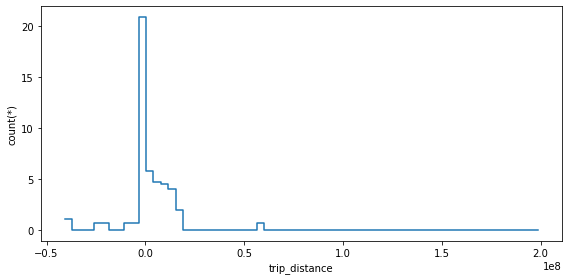

In [9]:
# Make a histograms of the trip distnaces (miles)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', f='log1p', progress='widget')
plt.show()

In [10]:
# What is the largest distance?
_ = df.trip_distance.max()

print(_, 'miles.')

print('This is %3.1f times larger than the distance between the Earth and the Moon!' % (_ / 238_900))
print('or')
print('This is %1.1f the distance to Mars!' % (_ / 33_900_000))

198623000.0 miles.
This is 831.4 times larger than the distance between the Earth and the Moon!
or
This is 5.9 the distance to Mars!


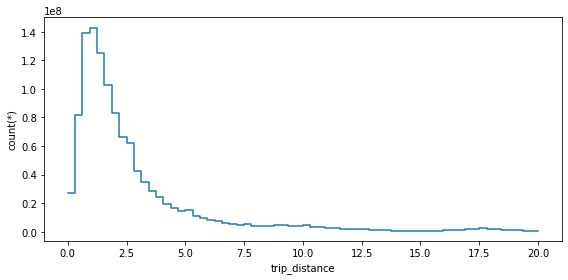

In [11]:
# Make another histogram of the trip distances, this time with a more sensible range
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', limits=[0, 20], progress='widget')
plt.show()

In [12]:
# Filter negative and too large distances
df = df[(df.trip_distance>0) & (df.trip_distance<10)]

### Remove rows from key columns that have missing values

In [13]:
# Drop NANs
df = df.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])

### What _is_ New York City really?

In [16]:
# # Interactively plot the pickup locations - helps to determine the extent of NYC covered by the taxi company
# df.widget.heatmap(df.pickup_longitude, 
#                   df.pickup_latitude, 
#                   shape=512, 
#                   f='log10', 
#                   colormap='plasma')

In [14]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
        (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
        (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
        (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

### Create some features

In [15]:
# Speed (miles per hour)
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))

# Time in transit (minutes)
df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')

# fare divided by distance
df['fare_by_distance'] = (df.fare_amount / df.trip_distance).jit_numba()

### Trip duration

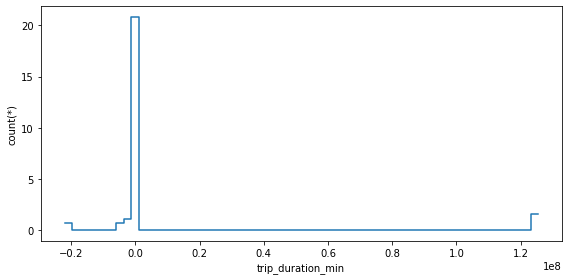

In [16]:
# Histogram of the drip durations (minutes)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', progress='widget')
plt.show()

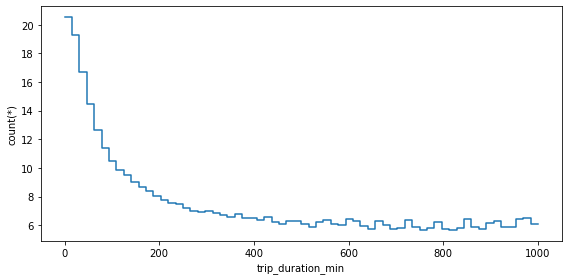

In [17]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', limits=[0, 1000], progress='widget')
plt.show()

In [18]:
# Filter, keep durations that are within 2 hours
df = df[(df.trip_duration_min>5) & (df.trip_duration_min<120)]

### Trip speed

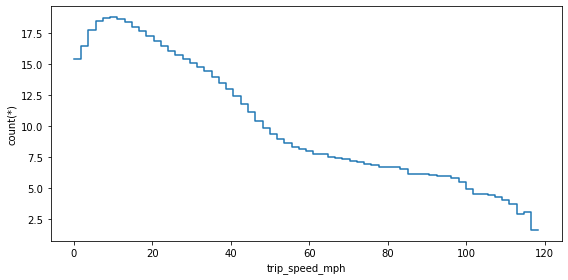

In [19]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_speed_mph', f='log1p', progress='widget')
plt.show()

In [20]:
# Filter, keep trips with average speeds between 2 and 60 miles per hour
df = df[(df.trip_speed_mph>=2) & (df.trip_speed_mph<=60)]

### Create some date/time features

In [21]:
# Daily activities

# Hour of day
df['pu_hour'] = df.pickup_datetime.dt.hour

# Day of week
df['pu_day_of_week'] = df.pickup_datetime.dt.dayofweek

# Month of yeah (January is encoded as 0)
df['pu_month'] = df.pickup_datetime.dt.month - 1

# Whether a day is weekend
df['pu_is_weekend'] = (df.pu_day_of_week>=5).astype('int')

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_names_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [22]:
# Treat these columns as ordinal encoded values
df = df.categorize(column='pu_hour')
df = df.categorize(column='pu_month')
df = df.categorize(column='pu_day_of_week')

/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result_data = op['op'](a_data, b_data)
/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in true_divide
  result_data = op['op'](a_data, b_data)


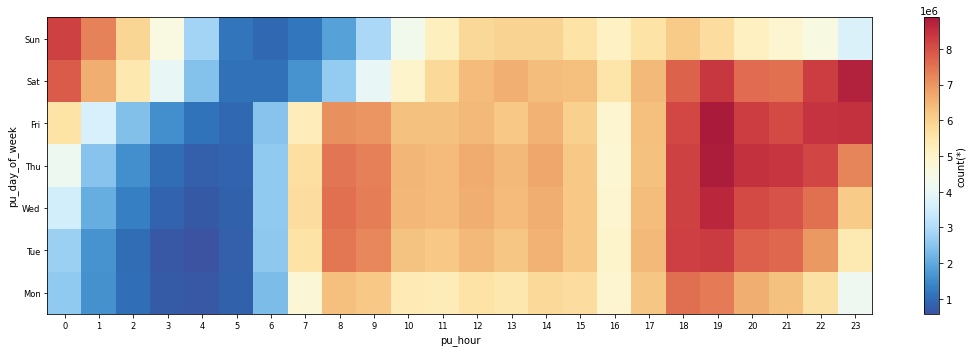

In [23]:
# Number of pick-ups per hour for a given day of the week
df.viz.heatmap('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), weekday_names_list)
plt.show()

### Groupby - simple example

In [24]:
df_per_hour = df.groupby(by=df.pu_hour).agg({'tip_amount': 'mean', 
                                             'trip_speed_mph': 'mean'
                                            })

# Display the grouped DataFrame
df_per_hour

#,pu_hour,tip_amount,trip_speed_mph
0,0,1.193070567441511,14.720083152911988
1,1,1.1786527042648098,15.626304631608944
2,2,1.1678830096874422,16.36464348846974
3,3,1.1417288202863118,17.03645864978392
4,4,1.0751638662851848,18.550483340096488
...,...,...,...
19,19,1.1614882064392154,11.228730032961629
20,20,1.1482312273887891,12.390238058368151
21,21,1.1838469236743534,13.148406125079537
22,22,1.1999837694429583,13.536938380858706


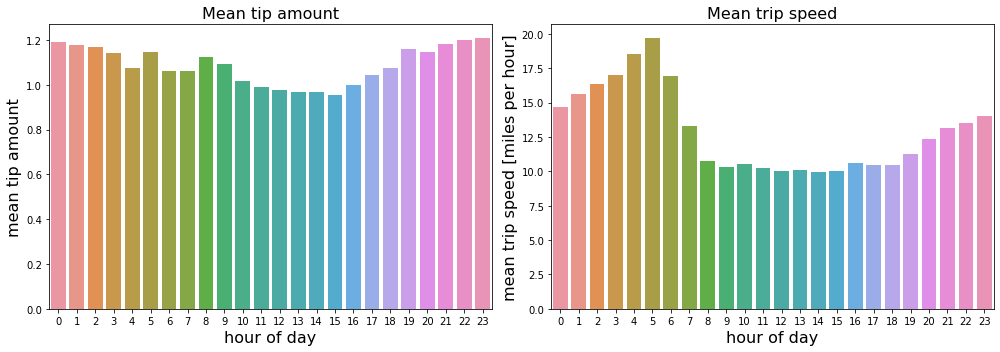

In [25]:
plt.figure(figsize=(14, 5))
fontsize = 16

plt.subplot(121)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.tip_amount.to_numpy())
plt.title('Mean tip amount', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)
plt.ylabel('mean tip amount', fontsize=fontsize)

plt.subplot(122)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.trip_speed_mph.to_numpy())
plt.title('Mean trip speed', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)
plt.ylabel('mean trip speed [miles per hour]', fontsize=fontsize)


plt.tight_layout()
plt.show()

### Groupby - harder example

In [26]:
# Inspect the payment type
df.payment_type.value_counts(progress='widget')

CRD          293172221
CSH          275913563
1             72921194
CASH          49592659
Cash          41375995
2             40263081
Credit        33648286
CAS           21615136
Cre           21473904
Cas           19042306
CRE            2715062
CREDIT         1948701
UNK             799928
NOC             495217
No Charge       259049
3               217939
DIS             175117
No               93044
4                86778
Dispute          48059
Dis              19338
NA               18956
5                   11
dtype: int64

From the documentation provided:
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [27]:
# Define a mapping dictionary
map_payment_type = {'crd': 1, 'credit': 1, 'cre': 1,
                    'csh': 2, 'cash': 2, 'cas': 2,
                    'no ': 3, 'noc': 3, 'no charge': 3, 
                    'dis': 4, 'dispute': 4, 
                    'unk': 5, 'na ': 5,
                    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


df['payment_type_clean'] = df.payment_type.str.lower().map(map_payment_type, 
                                                           default_value=-1, 
                                                           allow_missing=True)

In [29]:
df.payment_type_clean.value_counts(progress='widget')

2    447802740
1    425879368
3      1065249
5       818895
4       329292
dtype: int64

875895544